# Продвинутая визуализация с Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык продвинутой визуализации и форматирования данных с помощью matplotlib. Научиться использовать механизмы стилизации для фокусировки внимания читателей графиков

### Описание домашнего задания и формат сдачи

Выполните предложенные задачи по визуализации данных — впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

При построении графиков необходимо использовать объектно-ориентированный подход (задание графика через объекты Figure и Axes) везде, где это возможно. У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы и не накладываются друг на друга и на графики. При построении нескольких графиков в одних координатных осях должна быть легенда.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Критерии оценки

**"Зачет"** - выполнены задачи 1-6, каждый график отформатирован и читаем

**"На доработку"** - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [103]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте линейный график динамики объема продаж всех игр жанра "Sports" в Японии. Задайте графику размер 12 на 6

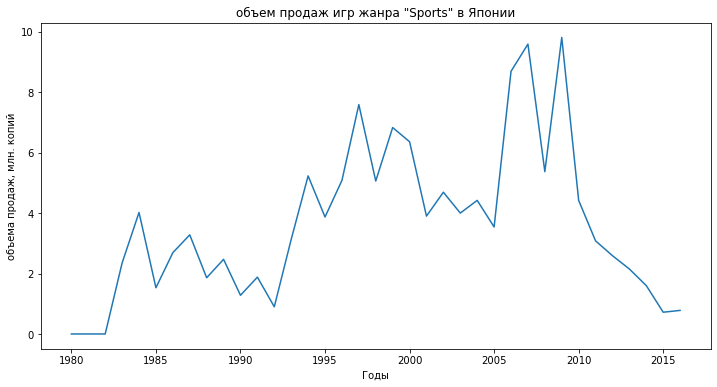

In [104]:
fig, axes = plt.subplots(figsize=(12, 6))

data = df[df['Genre']=='Sports'][['Year', 'JP_Sales']].groupby('Year').agg('sum')

axes.plot(data)
axes.set_xlabel('Годы')
axes.set_ylabel('объема продаж, млн. копий')
axes.set_title('объем продаж игр жанра "Sports" в Японии')

plt.show()

### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

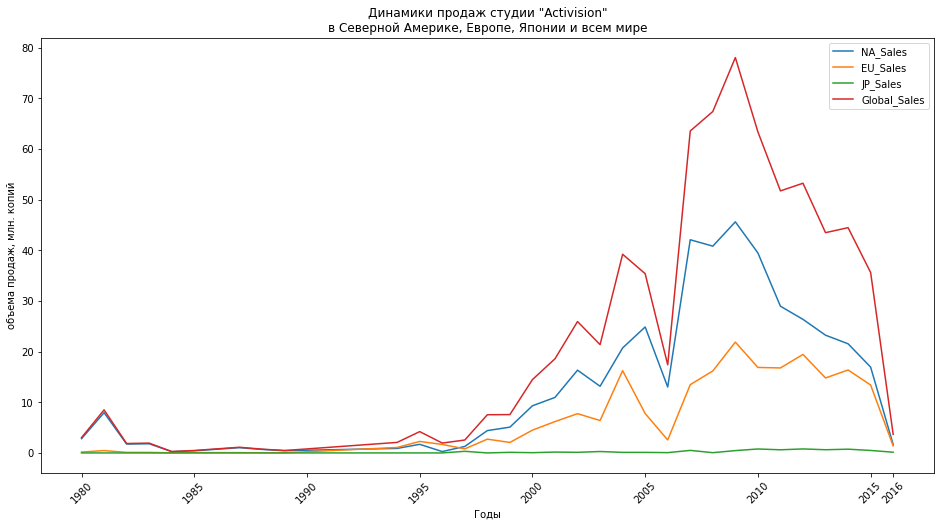

In [105]:
graphics_continents = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

data = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')
data.index = data.index.astype('int64')

fig, axes = plt.subplots(figsize=(16,8))
for continent in graphics_continents:
    axes.plot(data.index, data[continent], label=continent)

list_year = list(range(data.index.min(), data.index.max()+1, 5))
if data.index.max() not in list_year:
    list_year.append(data.index.max())

axes.set_xticks(list_year)
axes.set_xticklabels(list_year, rotation=45)
axes.set_xlabel('Годы')
axes.set_ylabel('объема продаж, млн. копий')
axes.set_title('Динамики продаж студии "Activision"\nв Северной Америке, Европе, Японии и всем мире')
axes.legend()
plt.show()

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

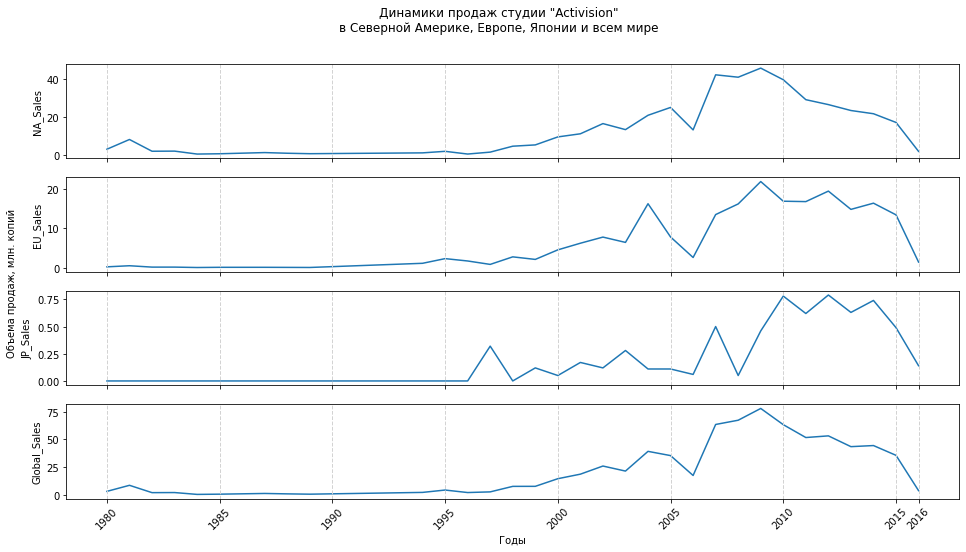

In [106]:
graphics_continents = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

data = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')
data.index = data.index.astype('int64')

fig, axes = plt.subplots(ncols=1, nrows=len(graphics_continents), figsize=(16,8), sharex=True)
fig.suptitle('Динамики продаж студии "Activision"\nв Северной Америке, Европе, Японии и всем мире')
for index, continent in enumerate(graphics_continents):
    list_year = list(range(data.index.min(), data.index.max()+1, 5))
    if data.index.max() not in list_year:
        list_year.append(data.index.max())
    
    axes[index].plot(data.index, data[continent], label=continent)
    axes[index].set_ylabel(f"{continent}")
    axes[index].set_xticks(list_year)
    for age in list_year:
        axes[index].axvline(age, color='lightgray', linewidth=1, linestyle='--')


axes[-1].set_xticklabels(list_year, rotation=45)
axes[-1].set_xlabel('Годы')
fig.text(0.078, 0.5, 'Объема продаж, млн. копий', ha='center', va='center', rotation='vertical')
plt.show()


### Задача 4

Постройте такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика. Итоговое полотно сделайте размером 12 на 12. Все графики должны разделять оси X и Y

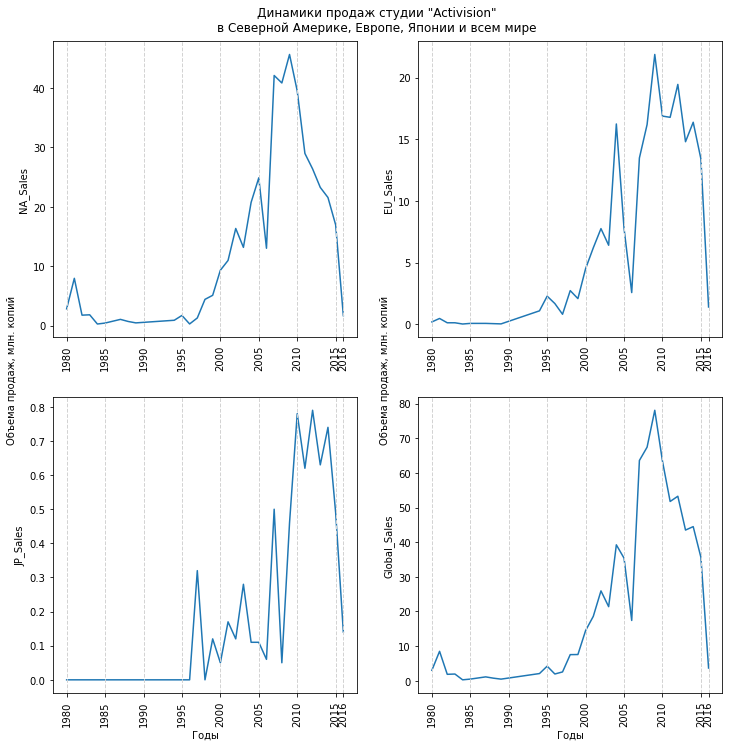

In [107]:
graphics_continents = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

data = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')
data.index = data.index.astype('int64')

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,12))
fig.suptitle('Динамики продаж студии "Activision"\nв Северной Америке, Европе, Японии и всем мире', y=0.92)

col = 0
row = 0

list_year = list(range(data.index.min(), data.index.max()+1, 5))
if data.index.max() not in list_year:
    list_year.append(data.index.max())
        
for index, continent in enumerate(graphics_continents):    
    axes[row][col].plot(data.index, data[continent], label=continent)
    axes[row][col].set_ylabel(f"{continent}")
    axes[row][col].set_xticks(list_year)
    axes[row][col].set_xticklabels(list_year, rotation=90)

    for age in list_year:
        axes[row][col].axvline(age, color='lightgray', linewidth=1, linestyle='--')
        
    col+= 1
    
    if index == 1:
        row += 1
        col = 0

axes[-1][0].set_xlabel('Годы')
axes[-1][1].set_xlabel('Годы')

fig.text(0.078, 0.5, 'Объема продаж, млн. копий', ha='center', va='center', rotation='vertical')
fig.text(0.51, 0.5, 'Объема продаж, млн. копий', ha='center', va='center', rotation='vertical')
plt.show()

### Задача 5

В одной координатной сетке постройте 2 гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков

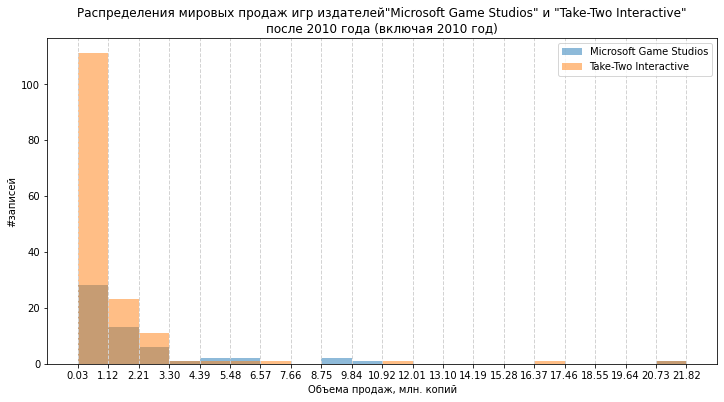

In [108]:
fig, axes = plt.subplots(figsize=(12,6))

data = df[df['Year'] >= 2010]

_, bins, _ = axes.hist(data[data['Publisher'] == 'Microsoft Game Studios']['Global_Sales'], alpha =0.5, label='Microsoft Game Studios', bins=20)
axes.hist(data[data['Publisher'] == 'Take-Two Interactive']['Global_Sales'], alpha =0.5, label='Take-Two Interactive', bins=bins)

for bins_ in bins:
    axes.axvline(bins_, color='lightgray', linewidth=1, linestyle='--')
    
axes.set_ylabel('#записей')
axes.set_xlabel('Объема продаж, млн. копий')
axes.set_xticks(bins)
axes.set_title('Распределения мировых продаж игр издателей"Microsoft Game Studios" и "Take-Two Interactive"\nпосле 2010 года (включая 2010 год)')

axes.legend()
plt.show()

### Задача 6

Определите 5 платформ, для которых в Японии было продано больше всего игр за все время. Проиллюстрируйте величину продаж на столбчатой диаграмме, столбец с самым высоким значением окрасьте зеленым, а с самым низким - красным

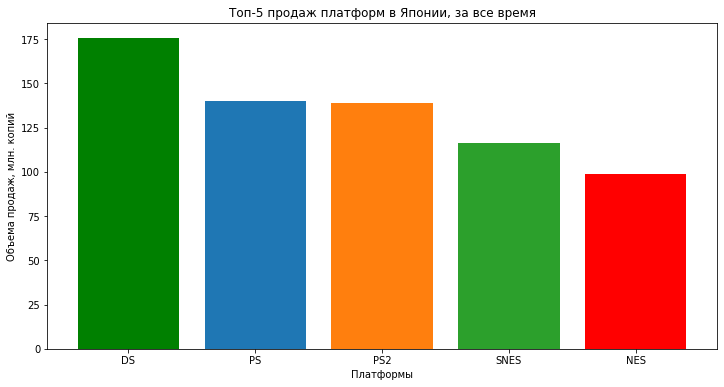

In [109]:
data = df.groupby('Platform').agg('sum').sort_values('JP_Sales', ascending = False).head(5)['JP_Sales']

fig, axes = plt.subplots(figsize=(12,6))

for index in data.index:
    if data.loc[index] == data.max():
        axes.bar(index, data.loc[index], color='green')
    elif data.loc[index] == data.min():
        axes.bar(index, data.loc[index], color='red')
    else:
        axes.bar(index, data.loc[index], label=index)

axes.set_xlabel('Платформы')
axes.set_ylabel('Объема продаж, млн. копий')
axes.set_title('Топ-5 продаж платформ в Японии, за все время')

plt.show()

## Дополнительные (необязательные) задачи


### Задача 7

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зеленого полупрозрачного прямоугольника

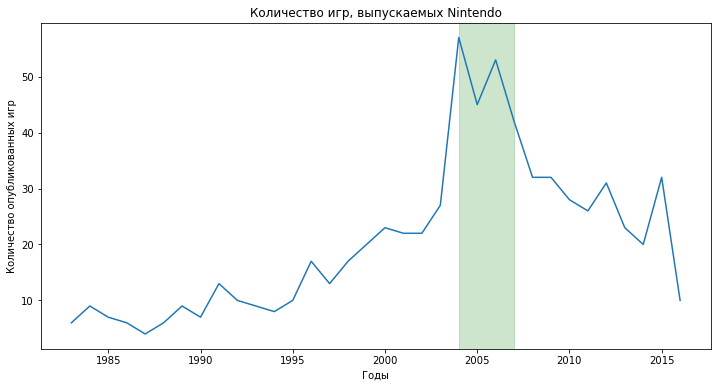

In [110]:
data = df[df['Publisher'] == 'Nintendo'].groupby('Year').agg('count')['Name']
top_interval = data[data >= 35].index

fig, axes = plt.subplots(figsize=(12,6))

axes.plot(data)
axes.axvspan(xmin=top_interval.min(), xmax=top_interval.max(), color='green', alpha=0.2)

axes.set_xlabel('Годы')
axes.set_ylabel('Количество опубликованных игр')
axes.set_title('Количество игр, выпускаемых Nintendo')

plt.show()

### Задача 8

Определите 3 жанра и 4 издателя с самыми большими продажами игр в мире за все время. Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанр, издатель). Размер итогового полотна определите самостоятельно таким образом, чтобы все графики были видны

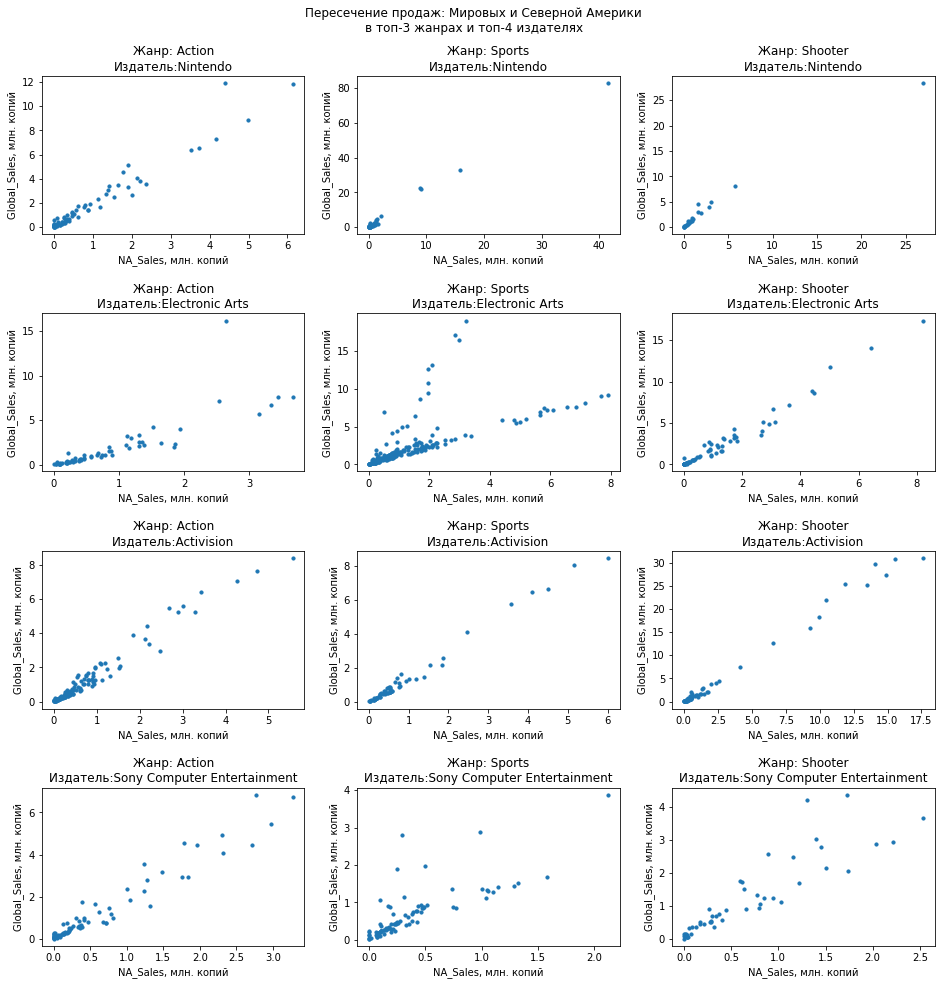

In [111]:
data_genre = df.groupby(['Genre']).agg('sum')[['Global_Sales']].sort_values('Global_Sales', ascending=False).head(3)
data_publisher = df.groupby(['Publisher']).agg('sum')[['Global_Sales']].sort_values('Global_Sales', ascending=False).head(4)

data_group = df.groupby(['Name', 'Genre', 'Publisher']).agg('sum')[['Global_Sales', 'NA_Sales']].sort_values('Global_Sales', ascending=False)

fig, axes = plt.subplots(figsize=(16,16), ncols=3, nrows=4)
fig.suptitle('Пересечение продаж: Мировых и Северной Америки\nв топ-3 жанрах и топ-4 издателях', y=0.94)

for ind_publ, publisher in enumerate(data_publisher.index):
    for ind_genre, genre in enumerate(data_genre.index):   
        gr_data = data_group.loc[:, genre, publisher]
        axes[ind_publ, ind_genre].scatter(gr_data['NA_Sales'], gr_data['Global_Sales'], s=10)
        axes[ind_publ, ind_genre].set_title(f"Жанр: {genre}\nИздатель:{publisher}")
        axes[ind_publ, ind_genre].set_xlabel('NA_Sales, млн. копий')
        axes[ind_publ, ind_genre].set_ylabel(f'Global_Sales, млн. копий')
fig.subplots_adjust(hspace=.5)